<a href="https://colab.research.google.com/github/mayowa-data/C7082/blob/main/Fruit_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
import keras  
import os
import glob 
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
from skimage import io 
from os import listdir
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import tensorflow_datasets as tfds

In [2]:
fruit_dir = '/content/drive/MyDrive/fruit'
fruit_dir = os.path.join(fruit_dir)
fruit_dir= glob.glob(fruit_dir)


In [4]:
batch_size = 100
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/fruit/train',
validation_split=0.4,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size= batch_size)

Found 294 files belonging to 2 classes.
Using 177 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/fruit/test',
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 97 files belonging to 2 classes.
Using 38 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['apples', 'tomatoes']


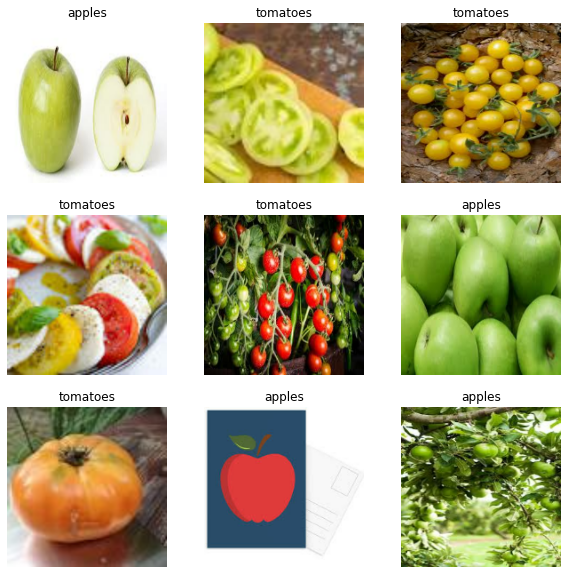

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 180, 180, 3)
(100,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [13]:

num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 26s 17s/step - loss: 2.3782 - accuracy: 0.4350 - val_loss: 0.9927 - val_accuracy: 0.4737
Epoch 2/10
2/2 [==============================] - 0s 108ms/step - loss: 0.8768 - accuracy: 0.4746 - val_loss: 0.6623 - val_accuracy: 0.5789
Epoch 3/10
2/2 [==============================] - 0s 93ms/step - loss: 0.6378 - accuracy: 0.6158 - val_loss: 0.6901 - val_accuracy: 0.5789
Epoch 4/10
2/2 [==============================] - 0s 85ms/step - loss: 0.6108 - accuracy: 0.6667 - val_loss: 0.6603 - val_accuracy: 0.6579
Epoch 5/10
2/2 [==============================] - 0s 87ms/step - loss: 0.5834 - accuracy: 0.7401 - val_loss: 0.6510 - val_accuracy: 0.5526
Epoch 6/10
2/2 [==============================] - 0s 81ms/step - loss: 0.5510 - accuracy: 0.7740 - val_loss: 0.6232 - val_accuracy: 0.6579
Epoch 7/10
2/2 [==============================] - 0s 80ms/step - loss: 0.5114 - accuracy: 0.8192 - val_loss: 0.6126 - val_accuracy: 0.6842
Epoch 8/10
2/2 [==========

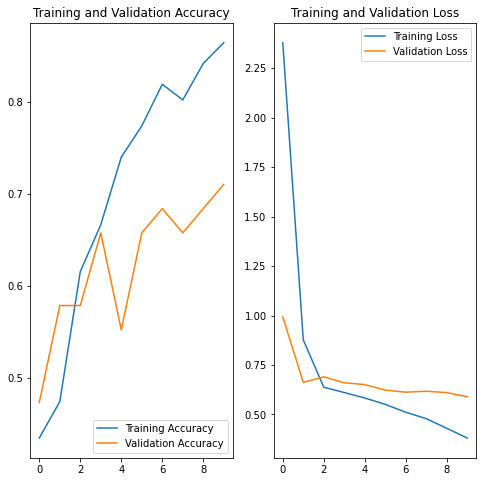

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [23]:
banana_dir = '/content/drive/MyDrive/fruit/test/tomatoes/img_p1_24.jpeg'
banana_path = os.path.join('/content/drive/MyDrive/fruit/test')
from PIL import Image
img_data = np.random.random(size=(180, 180, 3))
img = tf.keras.preprocessing.image.array_to_img(img_data)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 18ms/step
This image most likely belongs to tomatoes with a 99.77 percent confidence.


In [24]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [25]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [26]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_1_input'], 'outputs': ['dense_1']}}

In [27]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite


In [30]:
predictions_lite = classify_lite(rescaling_1_input=img_array)['dense_1']
score_lite = tf.nn.softmax(predictions_lite)

In [31]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to tomatoes with a 99.77 percent confidence.
